In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors
from sklearn_extra.cluster import KMedoids
from kmedoids import fasterpam
from ripser import ripser
from persim import plot_diagrams
from tqdm import tqdm
from time import time

from yao_utils_otra import *
from atlas_pam import atlas_pam

 12%|█▏        | 12/100 [00:00<00:00, 117.25it/s]

Computing brute matrix...


100%|██████████| 100/100 [00:00<00:00, 123.40it/s]

Done


In [2]:
data_dir = "data/sphere"
X = np.load(data_dir+"/sphere_uniform_1000.npy")

In [3]:
sphere_eps = 1e-6
n_radii = 100
n_thetas = 100

def draw_sphere(ax, alpha=0.3):
    radii = np.linspace(sphere_eps, 1.0, n_radii)
    thetas = np.linspace(0, 2*np.pi, n_thetas)
    Radii, Thetas = np.meshgrid(radii, thetas)
    sinT = np.sin(Thetas)
    cosT = np.cos(Thetas)
    X = Radii * cosT
    Y = Radii * sinT
    Z_pre = np.zeros(X.shape)
    Z = np.sqrt(np.max([1 - X**2 - Y**2, Z_pre], axis=0))
    Z_neg = - Z
    
    ax.plot_surface(X, Y, Z, alpha=alpha, color="grey")
    ax.plot_surface(X, Y, Z_neg, alpha=alpha, color="grey")

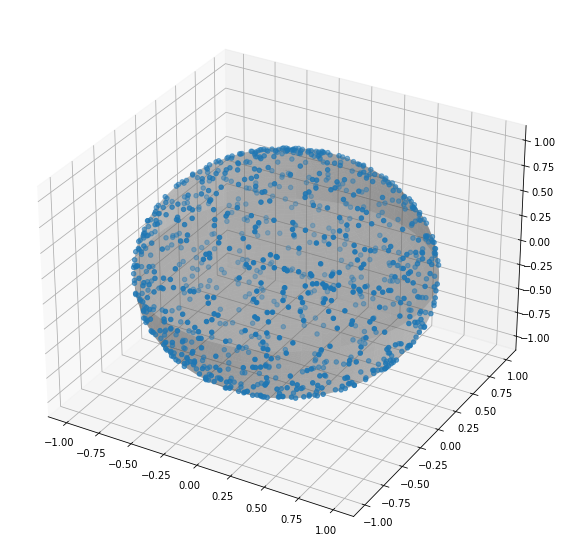

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
draw_sphere(ax)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

plt.show()

In [5]:
ac = atlas_pam(X, 2, 10)

  0%|          | 0/1000 [00:00<?, ?it/s]

Getting graph as sparse matrix...
Done
Getting graph from sparse matrix...
Done
Generating distance matrix...


100%|██████████| 1000/1000 [1:41:51<00:00,  6.11s/it] 


Done


In [6]:
def draw_total_on_sphere():
    # Get points from each chart
    Xs = []
    for ind in tqdm(range(ac.n_charts)):
        X = ac.sample_uniformly_from_chart_by_ind(ind, grid_len=10)
        Xs.append(X)
    X = np.vstack(Xs)
    # Draw points in spherical representation
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection="3d")
    draw_sphere(ax)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2])
    # Show graphic
    plt.show()

100%|██████████| 10/10 [00:00<00:00, 163.92it/s]


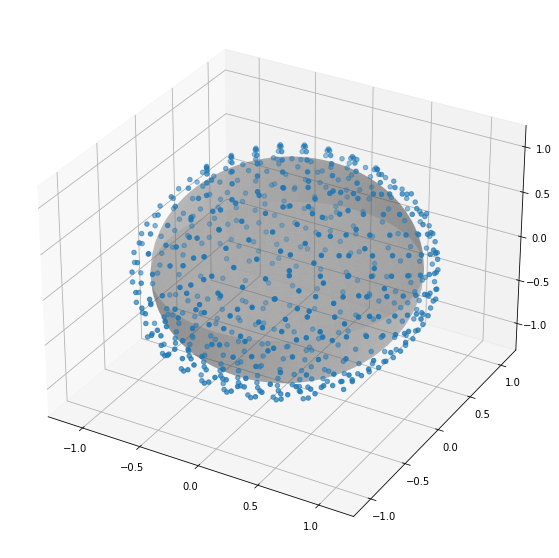

In [7]:
draw_total_on_sphere()

In [8]:
# Recreate axial rings from atlas graph
n_pts = 100
xis_xy = []
inds_xy = []
for theta in tqdm(np.linspace(0, 2*np.pi, n_pts)):
    x = np.array([np.cos(theta), np.sin(theta), 0.0])
    print(x)
    xi, ind = ac.ingest_ambient_point(x)
    print(xi)
    print(ind)
    x_prime = ac.xi_ind_to_ambient(xi, ind)
    print(x_prime)
    goober = ac.chart_dict[ind]
    for item in goober:
        print(item)
    print("\n")
    xis_xy.append(xi)
    inds_xy.append(ind)

 74%|███████▍  | 74/100 [00:00<00:00, 361.79it/s]

[1. 0. 0.]
[0.3358666  0.28386111]
5
[ 1.06132402 -0.00831181  0.02448303]
[ 0.9004713  -0.07615831  0.42819546]
[[ 0.25603453  0.29219795]
 [-0.51697439  0.84684082]
 [-0.8168132  -0.44438832]]
[[-0.92144814]
 [ 0.12489239]
 [-0.36787935]]
0.7884276217530207
[[-0.10000066]
 [ 0.56991768]
 [ 0.00684642]
 [ 0.54396472]]


[0.99798668 0.06342392 0.        ]
[0.30256257 0.33698278]
5
[1.06291232 0.05462395 0.02592094]
[ 0.9004713  -0.07615831  0.42819546]
[[ 0.25603453  0.29219795]
 [-0.51697439  0.84684082]
 [-0.8168132  -0.44438832]]
[[-0.92144814]
 [ 0.12489239]
 [-0.36787935]]
0.7884276217530207
[[-0.10000066]
 [ 0.56991768]
 [ 0.00684642]
 [ 0.54396472]]


[0.99195481 0.12659245 0.        ]
[0.26836169 0.38871398]
5
[1.06069376 0.11727563 0.02744337]
[ 0.9004713  -0.07615831  0.42819546]
[[ 0.25603453  0.29219795]
 [-0.51697439  0.84684082]
 [-0.8168132  -0.44438832]]
[[-0.92144814]
 [ 0.12489239]
 [-0.36787935]]
0.7884276217530207
[[-0.10000066]
 [ 0.56991768]
 [ 0.00684642]
 [ 0.54

100%|██████████| 100/100 [00:00<00:00, 324.27it/s]

0.7884276217530207
[[-0.10000066]
 [ 0.56991768]
 [ 0.00684642]
 [ 0.54396472]]


[ 0.87384938 -0.48619674  0.        ]
[ 0.55491894 -0.16473109]
5
[ 0.91182409 -0.4913438   0.01516104]
[ 0.9004713  -0.07615831  0.42819546]
[[ 0.25603453  0.29219795]
 [-0.51697439  0.84684082]
 [-0.8168132  -0.44438832]]
[[-0.92144814]
 [ 0.12489239]
 [-0.36787935]]
0.7884276217530207
[[-0.10000066]
 [ 0.56991768]
 [ 0.00684642]
 [ 0.54396472]]


[ 0.90292654 -0.42979491  0.        ]
[ 0.5332054  -0.10847143]
5
[ 0.94260367 -0.43517272  0.01584071]
[ 0.9004713  -0.07615831  0.42819546]
[[ 0.25603453  0.29219795]
 [-0.51697439  0.84684082]
 [-0.8168132  -0.44438832]]
[[-0.92144814]
 [ 0.12489239]
 [-0.36787935]]
0.7884276217530207
[[-0.10000066]
 [ 0.56991768]
 [ 0.00684642]
 [ 0.54396472]]


[ 0.92836793 -0.37166246  0.        ]
[ 0.50966628 -0.05180857]
5
[ 0.97037901 -0.37735661  0.01677252]
[ 0.9004713  -0.07615831  0.42819546]
[[ 0.25603453  0.29219795]
 [-0.51697439  0.84684082]
 [-0.8168132  -0.4

100%|██████████| 100/100 [00:00<00:00, 342.27it/s]


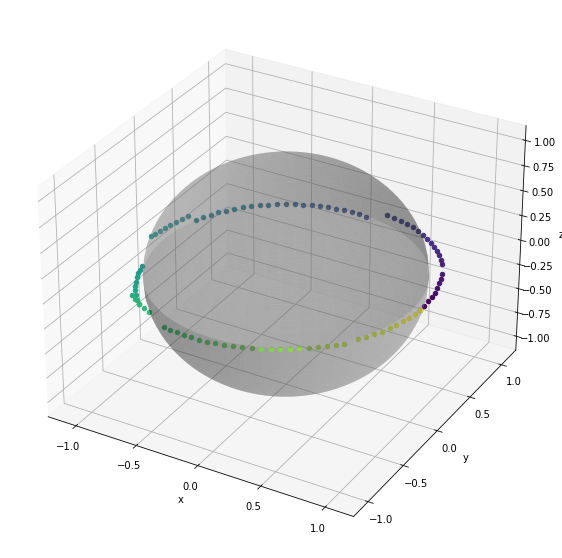

In [9]:
# Recreate ring from atlas graph
pts_xy = []
for xi, ind in zip(xis_xy, inds_xy):
    x = ac.xi_ind_to_ambient(xi, ind)
    pts_xy.append(x)
pts_xy = np.vstack(pts_xy)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

draw_sphere(ax)

rgb_map = colormaps["viridis"]

#for ind in tqdm(range(n_pts)):
for ind in tqdm(range(100)):
    rgb = rgb_map(ind / n_pts)[:-1]
    ax.scatter(pts_xy[ind, 0], pts_xy[ind, 1], pts_xy[ind, 2],
              color=rgb)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

x_2, L_2, M_2, rad_2, h_mat_2 = ac.chart_dict[2]
x_3, L_3, M_3, rad_3, h_mat_3 = ac.chart_dict[3]

print(x_2)

In [10]:
def draw_chart_on_sphere(ind):
    # Get points from chart
    X = ac.sample_uniformly_from_chart_by_ind(ind, grid_len=10)
    # Draw points in spherical representation
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection="3d")
    draw_sphere(ax)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2])
    # Show graphic
    plt.show()

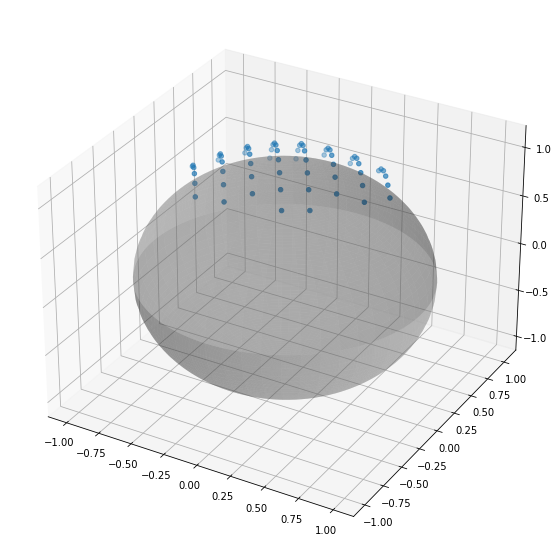

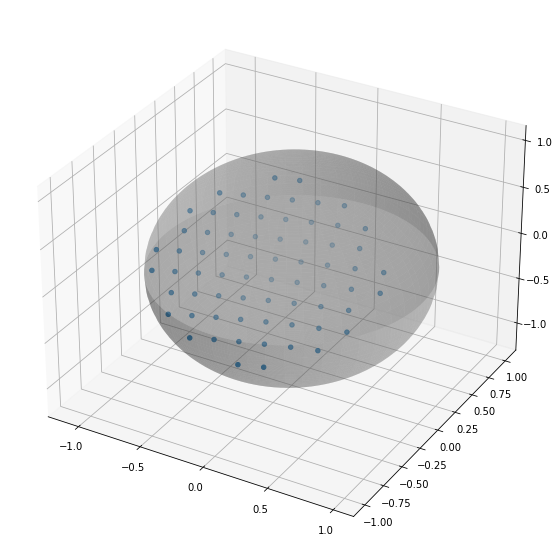

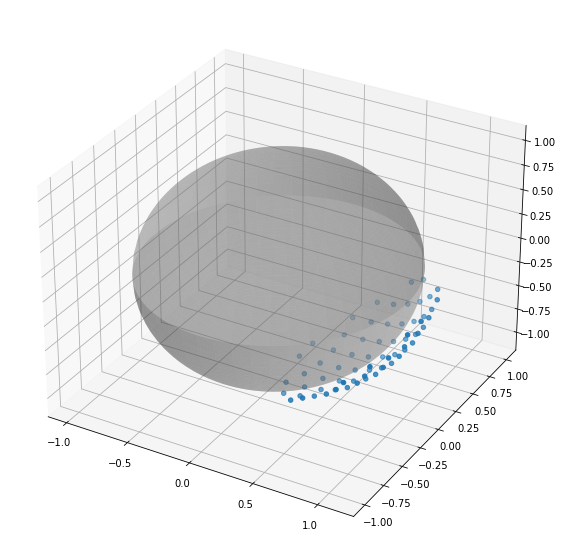

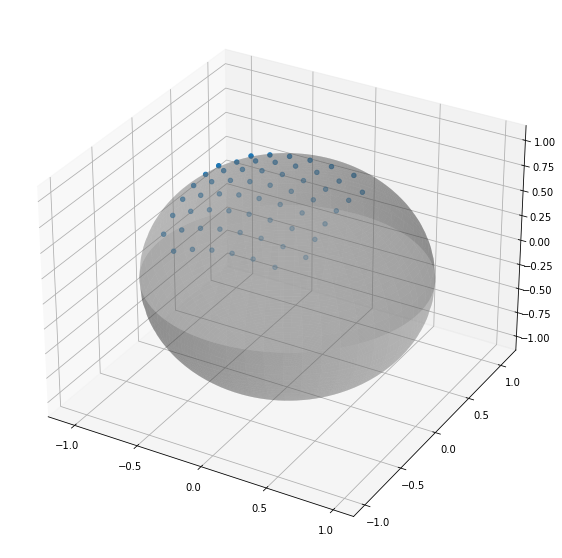

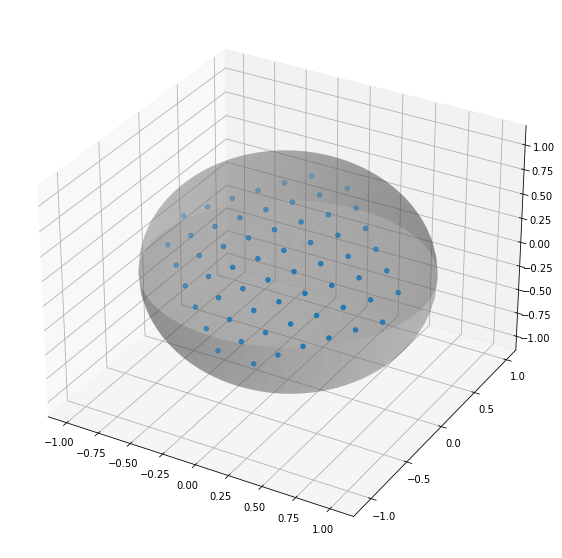

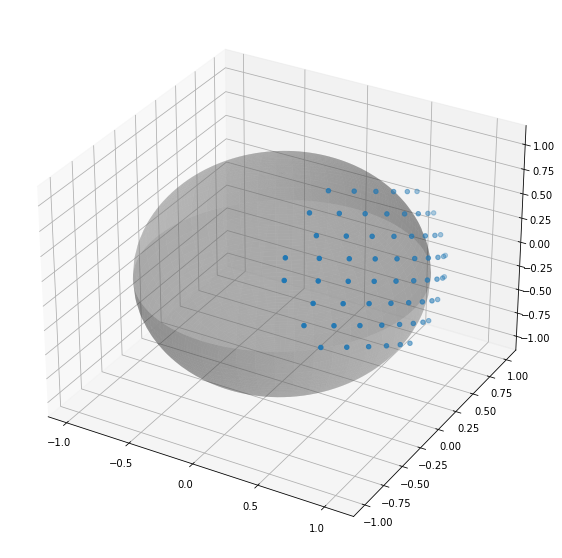

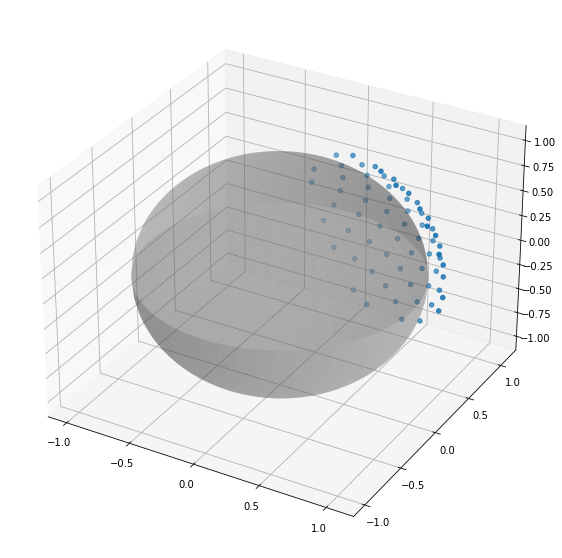

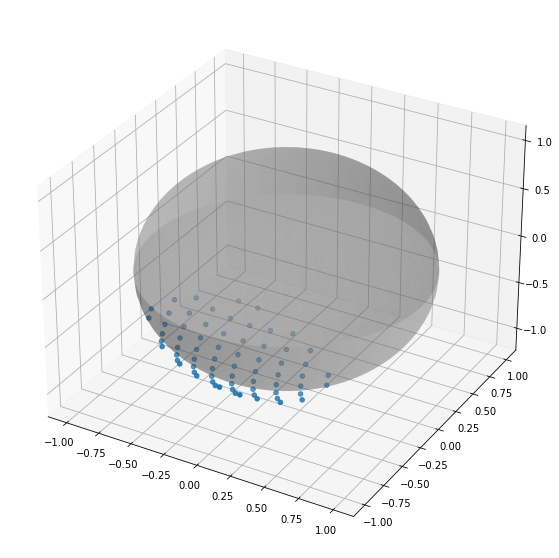

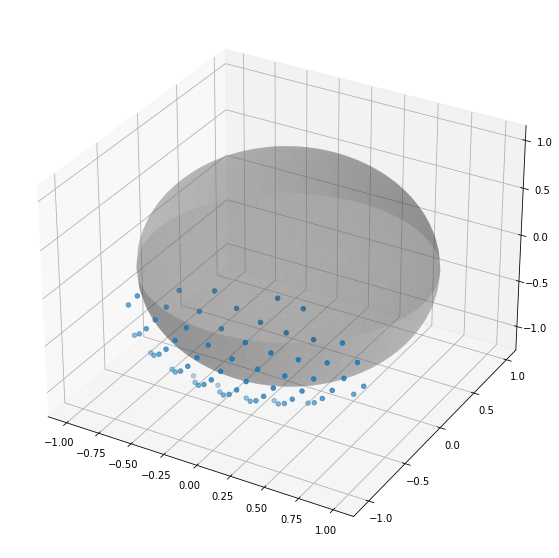

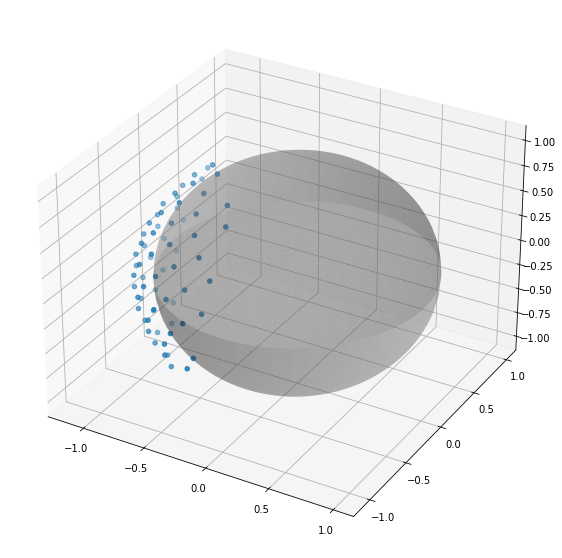

In [11]:
for ind in range(10):
    draw_chart_on_sphere(ind)